In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from scipy import signal


data = np.load(r'../numpy/1006.npy')
time_series = np.load(r'../numpy/1006_time.npy', allow_pickle=True)

sample_1006 = np.load(r'../numpy/sample_1006.npy', allow_pickle=True)
sample_time = np.load(r'../numpy/sample_time.npy', allow_pickle=True)

config = {
    "font.family": 'serif',  # 衬线字体
    "font.size": 10.5,  # 字体大小
    "mathtext.fontset": 'stix',  # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    "font.serif": ['Microsoft YaHei'],
    'axes.unicode_minus': False  # 处理负号，即-号
}
rcParams.update(config)
plt.rcParams['figure.dpi'] = 100

# 找出数组周期
---

In [2]:
def find_cycle(sample_np: np.ndarray, estimated):

    bias_list = np.array([])
    cycle_list = np.arange(estimated-100, estimated+100)

    for cycle in cycle_list:
        bias = sample_np[:-cycle] - sample_np[cycle:]
        bias_abs = np.linalg.norm(bias) / (len(sample_np) - cycle)

        bias_list = np.append(bias_list, bias_abs)

    return cycle_list, bias_list

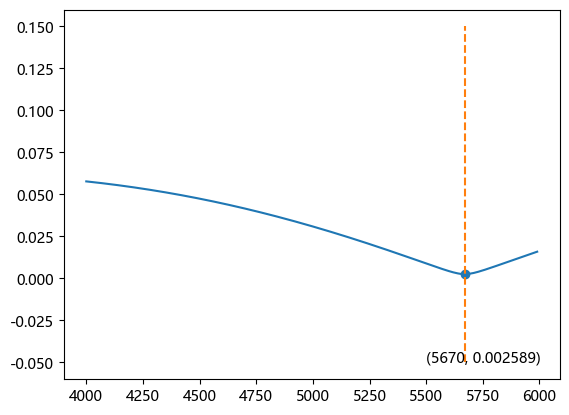

<Figure size 640x480 with 0 Axes>

In [3]:
cycle_np, bias_np = find_cycle(sample_1006[0], 500)
cycle_np *= 10  #  采样间隔为10s，所以每个点*10就是对应的时间
bias_min = np.min(bias_np)  # 最小偏差值
index_min = np.where(bias_np==bias_min)
cycle = cycle_np[index_min]  # 最小偏差值对应的时间就是周期

plt.plot(cycle_np, bias_np)
plt.scatter(cycle, bias_min)
plt.plot([cycle, cycle], [-0.05, 0.15], '--')
plt.text(5500, -0.05, '(%d, %f)' % (cycle, bias_min))
plt.show()
plt.clf()

# current && voltage 0-100000
---

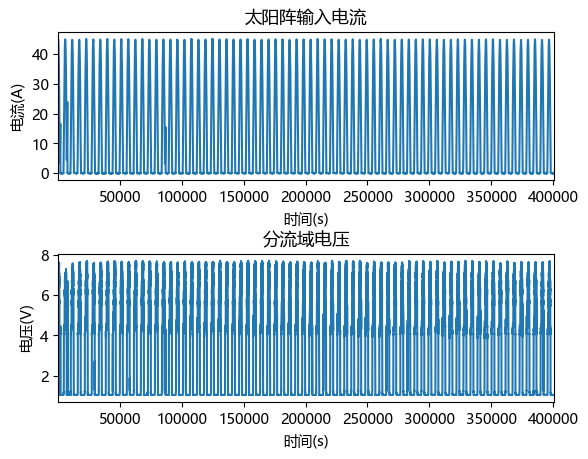

<Figure size 640x480 with 0 Axes>

In [4]:
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
plt.title('太阳阵输入电流')
plt.ylabel('电流(A)')
plt.xlabel('时间(s)')
plt.plot(time_series[:100000], data[0, :100000])
plt.xlim(time_series[0], time_series[100000])

plt.subplot(2, 1, 2)
plt.title('分流域电压')
plt.ylabel('电压(V)')
plt.xlabel('时间(s)')
plt.plot(time_series[:100000], data[1, :100000])
plt.xlim(time_series[0], time_series[100000])

plt.show()
plt.clf()

# 太阳阵输入电流(current 0-10000)
---

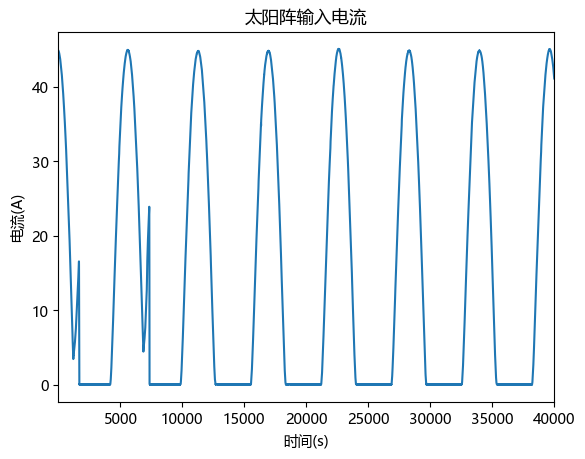

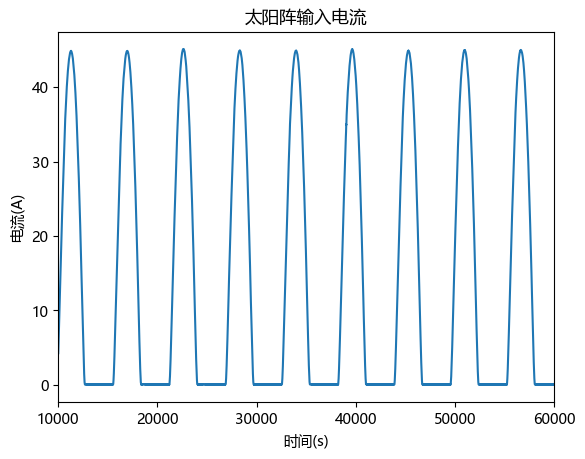

<Figure size 640x480 with 0 Axes>

In [5]:
plt.title('太阳阵输入电流')
plt.ylabel('电流(A)')
plt.xlabel('时间(s)')
plt.plot(time_series[:10000], data[0, :10000])
plt.xlim(time_series[0], time_series[10000])
plt.show()
plt.clf()

plt.title('太阳阵输入电流')
plt.ylabel('电流(A)')
plt.xlabel('时间(s)')
plt.plot(sample_time[:5000], sample_1006[0, :5000])
plt.xlim(sample_time[0], sample_time[5000])
plt.show()
plt.clf()

### 将current样本储存到sample

In [6]:
sample = sample_1006[0].reshape(1, -1)  

# 分流域电压(voltage 0-10000)
---

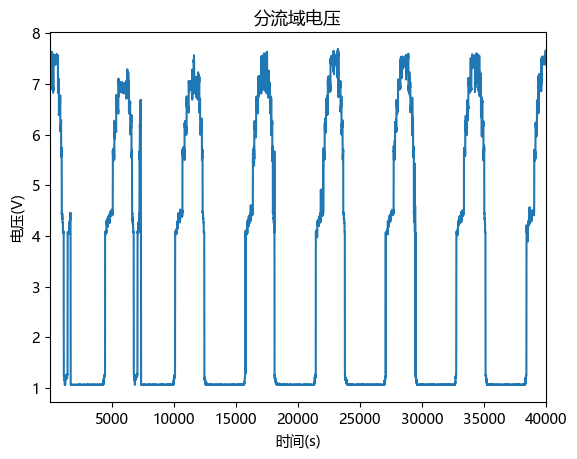

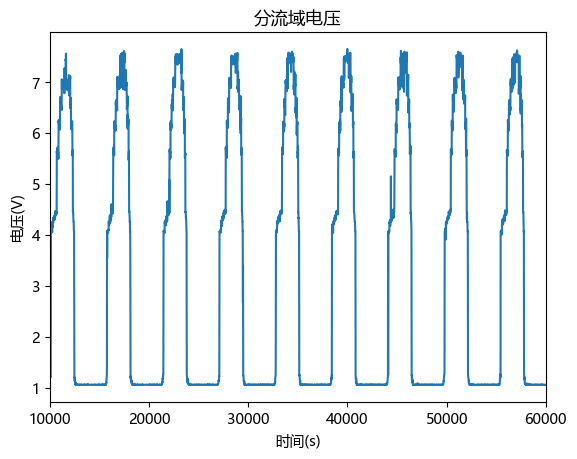

<Figure size 640x480 with 0 Axes>

In [7]:
plt.title('分流域电压')
plt.ylabel('电压(V)')
plt.xlabel('时间(s)')
plt.plot(time_series[:10000], data[1, :10000])
plt.xlim(time_series[0], time_series[10000])
plt.show()
plt.clf()

plt.title('分流域电压')
plt.ylabel('电压(V)')
plt.xlabel('时间(s)')
plt.plot(sample_time[:5000], sample_1006[1, :5000])
plt.xlim(sample_time[0], sample_time[5000])
plt.show()
plt.clf()

### voltage数据平滑处理

In [8]:
voltage_sample_smooth = signal.savgol_filter(sample_1006[1], 53, 1)  # 平滑处理

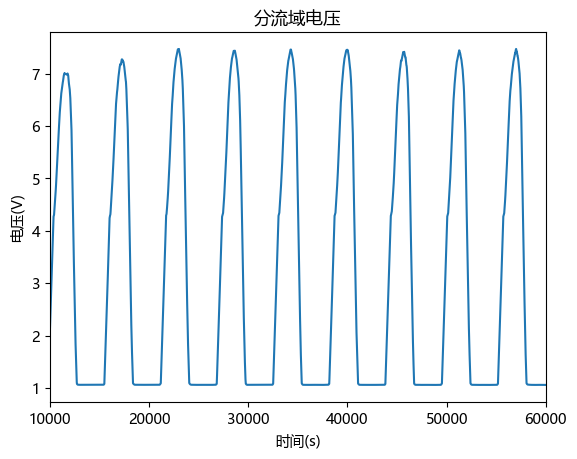

<Figure size 640x480 with 0 Axes>

In [9]:
plt.title('分流域电压')
plt.ylabel('电压(V)')
plt.xlabel('时间(s)')
plt.plot(sample_time[:5000], voltage_sample_smooth[:5000])
plt.xlim(sample_time[0], sample_time[5000])
plt.show()
plt.clf()

### 将voltage样本储存到sample

In [10]:
sample_process = np.append(sample, voltage_sample_smooth.reshape(1, -1), axis=0)

# 储存sample
---

In [11]:
np.save('../numpy/sample_process.npy', sample_process)